# **MÓDULO 32 - Exercício**
# Random Forest


Nesta tarefa, vocês vão trabalhar com uma base de dados de avaliações de vinhos, onde o objetivo é prever a pontuação dos vinhos usando o algoritmo de Random Forest para classificação multiclasse.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("winequality-red.csv", delimiter=',')

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Vamos conhecer nossa base:**

Características dos Vinhos (Features)

Fixed Acidity: Acidez fixa do vinho.

Volatile Acidity: Acidez volátil do vinho.

Citric Acid: Quantidade de ácido cítrico no vinho.

Residual Sugar: Açúcar residual presente no vinho.

Chlorides: Nível de cloretos no vinho.

Free Sulfur Dioxide: Dióxido de enxofre livre no vinho.

Total Sulfur Dioxide: Quantidade total de dióxido de enxofre no vinho.

Density: Densidade do vinho.

pH: Nível de pH do vinho.

Sulphates: Quantidade de sulfatos no vinho.

Alcohol: Teor alcoólico do vinho.



**Variável de Saída (Target):**

Quality: Pontuação do vinho baseada em dados sensoriais, variando de 0 a 10.


Esta abordagem permitirá que vocês explorem como diferentes características químicas influenciam a qualidade dos vinhos e como o Random Forest pode ser usado para fazer previsões precisas com base nesses dados.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [4]:
#seu código aqui
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Não existe dados nulos.

# 2 - Realize a segunda e terceita etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

B) Verifique o balanceamento da váriavel Target.

C)  Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.

D) Crie um novo dataframe apenas com as váriaveis que parecem ter maior correlação com a target. (Negativa ou positiva)


In [5]:
#seu código aqui



df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Analisando a tabela, identifiquei alguns possiveis outliers, tais como: residual sugar, total sulfur dioxide, chlorides, sulphates. A seguir vou plotar os bloxplots pra confirmar os outliers e ver possiveis opções para o tratamentos da nossa base 

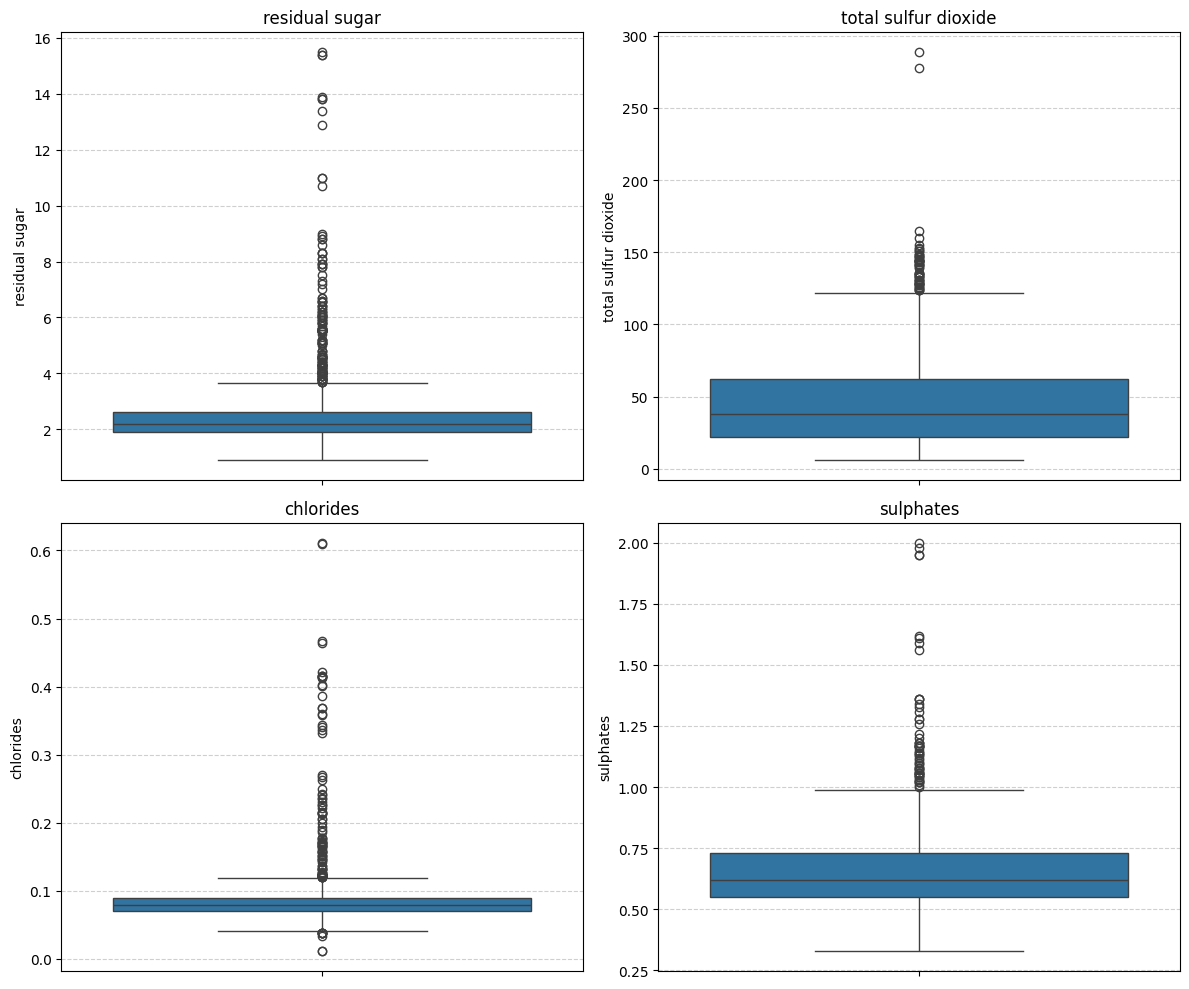

In [6]:
colunas = ['residual sugar', 'total sulfur dioxide', 'chlorides', 'sulphates']

plt.figure(figsize=(12,10))
for i, col in enumerate(colunas, 1):
    plt.subplot(2,2,i)
    sns.boxplot(y=df[col].dropna())
    plt.title(col)
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


Agora com gráfico fica visivel os outliers, e agora vamos tratar.

In [7]:

Q1 = df['chlorides'].quantile(0.25)
Q3 = df['chlorides'].quantile(0.75)

IQR = Q3-Q1

lim_inferior = Q1 - 1.5 * IQR
lim_superior = Q3 + 1.5 * IQR

df_chlorides = df.loc[
    (df['chlorides'] >= lim_inferior) &
    (df['chlorides'] <= lim_superior)
].copy()
dados_originais = df.shape[0]
zc = ((df.shape[0] - df_chlorides.shape[0]) / df.shape[0])
z2 = zc*100

print("Original:", df.shape[0], "-> Filtrado:", df_chlorides.shape[0], "-> Porcentangem perdida: % {:.2f}".format(z2))

Original: 1599 -> Filtrado: 1487 -> Porcentangem perdida: % 7.00


In [8]:

Q1 = df['sulphates'].quantile(0.25)
Q3 = df['sulphates'].quantile(0.75)

IQR = Q3-Q1

lim_inferior = Q1 - 1.5 * IQR
lim_superior = Q3 + 1.5 * IQR

df_sulphates = df.loc[
    (df['sulphates'] >= lim_inferior) &
    (df['sulphates'] <= lim_superior)
].copy()

zs = ((df.shape[0] - df_sulphates.shape[0]) / df.shape[0])
z2 = zs*100

print("Original:", df.shape[0], "-> Filtrado:", df_sulphates.shape[0], "-> Porcentangem perdida: % {:.2f}".format(z2))

Original: 1599 -> Filtrado: 1540 -> Porcentangem perdida: % 3.69


In [9]:

Q1 = df['residual sugar'].quantile(0.25)
Q3 = df['residual sugar'].quantile(0.75)

IQR = Q3-Q1

lim_inferior = Q1 - 1.5 * IQR
lim_superior = Q3 + 1.5 * IQR

df_residual = df.loc[
    (df['residual sugar'] >= lim_inferior) &
    (df['residual sugar'] <= lim_superior)
].copy()

zr = ((df.shape[0] - df_residual.shape[0]) / df.shape[0])
z2 = zr*100

print("Original:", df.shape[0], "-> Filtrado:", df_residual.shape[0], "-> Porcentangem perdida: % {:.2f}".format(z2))

Original: 1599 -> Filtrado: 1444 -> Porcentangem perdida: % 9.69


In [10]:

Q1 = df['total sulfur dioxide'].quantile(0.25)
Q3 = df['total sulfur dioxide'].quantile(0.75)

IQR = Q3-Q1

lim_inferior = Q1 - 1.5 * IQR
lim_superior = Q3 + 1.5 * IQR

df_dioxide = df.loc[
    (df['total sulfur dioxide'] >= lim_inferior) &
    (df['total sulfur dioxide'] <= lim_superior)
].copy()

zd = ((df.shape[0] - df_sulphates.shape[0]) / df.shape[0])
z2 = zd*100

print("Original:", df.shape[0], "-> Filtrado:", df_dioxide.shape[0], "-> Porcentangem perdida: % {:.2f}".format(z2))

print("Total de dados perdios no tratamento de outliers: % {:.2f}".format(((zd+zc+zs+zr)*100)))


Original: 1599 -> Filtrado: 1544 -> Porcentangem perdida: % 3.69
Total de dados perdios no tratamento de outliers: % 24.08


In [11]:
df_tratado = df_dioxide

X = df_tratado.drop(['quality'], axis=1)
y = df_tratado['quality']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print("Shape X_train:", X_train.shape)
print("Shape X_test: ", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test: ", y_test.shape)

from imblearn.over_sampling import SMOTE
from collections import Counter

print("Valores antes do balanceamento:", Counter(y))

Shape X_train: (1235, 11)
Shape X_test:  (309, 11)
Shape y_train: (1235,)
Shape y_test:  (309,)
Valores antes do balanceamento: Counter({5: 634, 6: 632, 7: 197, 4: 53, 8: 18, 3: 10})


In [12]:
# Calculando a correlação
correlacao = df_tratado.corr(numeric_only=True)

# Transformando a correlação em formato "long" para plotar
correlacao_long = correlacao.reset_index().melt(id_vars='index')
correlacao_long.columns = ['Variavel1', 'Variavel2', 'Correlacao']

import plotly.express as px

# Plotando com plotly
fig = px.imshow(
    correlacao.values,
    labels=dict(x="Variáveis", y="Variáveis", color="Correlação"),
    x=correlacao.columns,
    y=correlacao.columns,
    color_continuous_scale='RdBu_r',
    zmin=-1, zmax=1
)
fig.update_layout(title='Mapa de Correlação Interativo')
fig.show()

In [13]:
df_filtrado = df_tratado[['quality', 'alcohol', 'sulphates', 'volatile acidity']]
df_filtrado.head(5)


,quality,alcohol,sulphates,volatile acidity
0,5,9.4,0.56,0.70
1,5,9.8,0.68,0.88
2,5,9.8,0.65,0.76
3,6,9.8,0.58,0.28
4,5,9.4,0.56,0.70


# 3 - Preparação Final dos Dados

A) Separe a base em X(Features) e Y(Target)

B) Separe a base em treino e teste.


In [14]:
#seu código aqui
X = df_filtrado.drop(['quality'], axis=1)
y = df_filtrado['quality']

print("Valores antes do balanceamento:", Counter(y))

smote = SMOTE(random_state=42)

X_train_bal, y_train_bal = smote.fit_resample(X, y)

print("Valores antes do balanceamento:", Counter(y_train_bal))



Valores antes do balanceamento: Counter({5: 634, 6: 632, 7: 197, 4: 53, 8: 18, 3: 10})
Valores antes do balanceamento: Counter({5: 634, 6: 634, 7: 634, 4: 634, 8: 634, 3: 634})


# 4 - Modelagem

A) Inicie e treine o modelo de Random Forest

B) Aplique a base de teste o modelo.


In [15]:
#seu código aqui

X_train, X_test, y_train, y_test = train_test_split(X_train_bal, y_train_bal, random_state=42, test_size=0.2)

rf_model = RandomForestClassifier(random_state=42)



In [16]:
rf_model.fit(X_train_bal,y_train_bal)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
Y_pred = rf_model.predict(X_test)


In [18]:
# Avaliando o modelo
accuracy = accuracy_score(y_test, Y_pred)
report = classification_report(y_test, Y_pred)
conf_matrix = confusion_matrix(y_test, Y_pred)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:\n", report)
print("Matriz de Confusão:\n", conf_matrix)

Acurácia: 1.00
Relatório de Classificação:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00       125
           4       1.00      1.00      1.00       127
           5       0.99      1.00      1.00       129
           6       1.00      0.99      1.00       124
           7       1.00      1.00      1.00       116
           8       1.00      1.00      1.00       140

    accuracy                           1.00       761
   macro avg       1.00      1.00      1.00       761
weighted avg       1.00      1.00      1.00       761

Matriz de Confusão:
 [[125   0   0   0   0   0]
 [  0 127   0   0   0   0]
 [  0   0 129   0   0   0]
 [  0   0   1 123   0   0]
 [  0   0   0   0 116   0]
 [  0   0   0   0   0 140]]


# 5 - Avaliação

A) Avalie as principais métricas da Claissificação e traga insights acerca do resultado, interprete os valores achados.

B) Você nota que o modelo teve dificuldade para prever alguma classe? Se sim, acredita que tenha relação com o balanceamento dos dados? Explique.


**R)** -A) O modelo tem excelentes resultados, classificando a qualidade dos vinhos com 99.9% de precisão. O modelo obteve um minimo erro ao classificar a qualidade dos tipos: 5,6
B) Não notei dificuldade do modelo em prever as classes pois, eu trbalhei com os dados balanceados desde do inicio.

# 5 - Melhorando os Hyperparametros

A) Defina o Grid de parametros que você quer testar

B) Inicie e Treine um novo modelo utilizando o random search.

C) Avalie os resultados do modelo.

D) Você identificou melhorias no modelo após aplicar o random search? Justifique.


ps. Essa parte da atividade demorará um pouco para rodar!

In [20]:
#seu código aqui

# Definir o espaço de busca dos hiperparâmetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [21]:

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

In [22]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,100
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [23]:
Y_pred = random_search.predict(X_test)

In [24]:
# Avaliando o modelo
accuracy = accuracy_score(y_test, Y_pred)
report = classification_report(y_test, Y_pred)
conf_matrix = confusion_matrix(y_test, Y_pred)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:\n", report)
print("Matriz de Confusão:\n", conf_matrix)

Acurácia: 0.79
Relatório de Classificação:
               precision    recall  f1-score   support

           3       0.89      0.93      0.91       125
           4       0.82      0.85      0.84       127
           5       0.68      0.64      0.66       129
           6       0.62      0.56      0.59       124
           7       0.79      0.78      0.79       116
           8       0.91      0.97      0.94       140

    accuracy                           0.79       761
   macro avg       0.79      0.79      0.79       761
weighted avg       0.79      0.79      0.79       761

Matriz de Confusão:
 [[116   4   3   2   0   0]
 [  6 108   8   4   1   0]
 [  6  10  83  26   3   1]
 [  1   8  23  70  17   5]
 [  2   1   5  10  91   7]
 [  0   0   0   1   3 136]]


O modelo RandomSearch apresentou resultados bem inferiores.

# 6 - Chegando a perfeição

Baseado em tudo que você já aprendeu até agora, quais outras técnicas você acredita que poderiam ser aplicadas ao modelo para melhorar ainda mais suas previsões?

Podemos obter os melhores hyperparâmetros atraves de um metodo randomico

In [26]:
best_rf_model = random_search.best_estimator_
best_rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
best_params = random_search.best_params_
print(f"Melhores Hiperparâmetros: {best_params}")

Melhores Hiperparâmetros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20}


In [28]:
Y_pred = best_rf_model.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, Y_pred)
report = classification_report(y_test, Y_pred)
conf_matrix = confusion_matrix(y_test, Y_pred)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:\n", report)
print("Matriz de Confusão:\n", conf_matrix)

Acurácia: 0.79
Relatório de Classificação:
               precision    recall  f1-score   support

           3       0.89      0.93      0.91       125
           4       0.82      0.85      0.84       127
           5       0.68      0.64      0.66       129
           6       0.62      0.56      0.59       124
           7       0.79      0.78      0.79       116
           8       0.91      0.97      0.94       140

    accuracy                           0.79       761
   macro avg       0.79      0.79      0.79       761
weighted avg       0.79      0.79      0.79       761

Matriz de Confusão:
 [[116   4   3   2   0   0]
 [  6 108   8   4   1   0]
 [  6  10  83  26   3   1]
 [  1   8  23  70  17   5]
 [  2   1   5  10  91   7]
 [  0   0   0   1   3 136]]


O modelo não obteve melhoras com os novos hiperparâmetros. 